In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

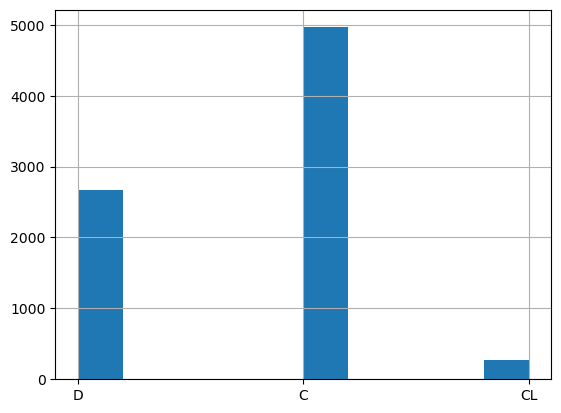

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

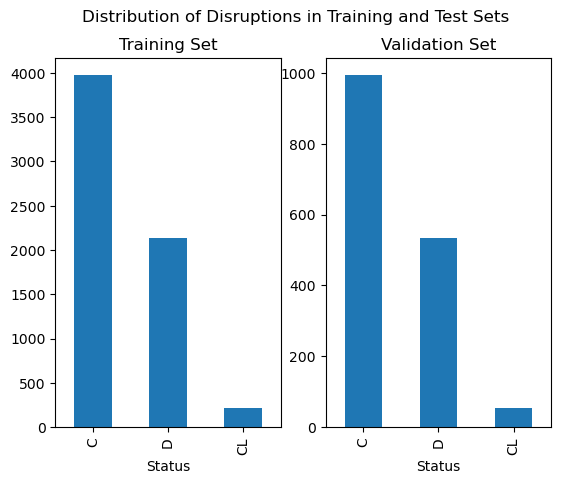

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

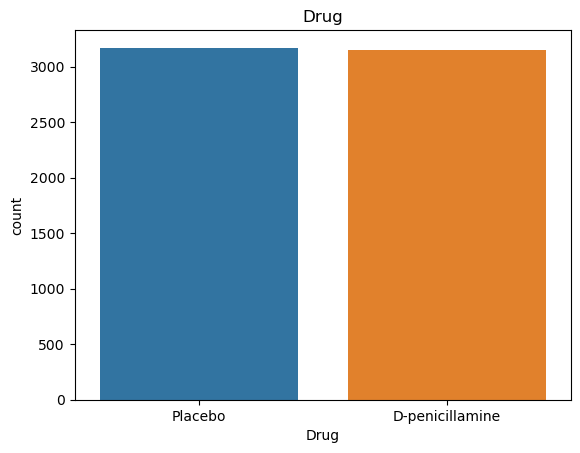

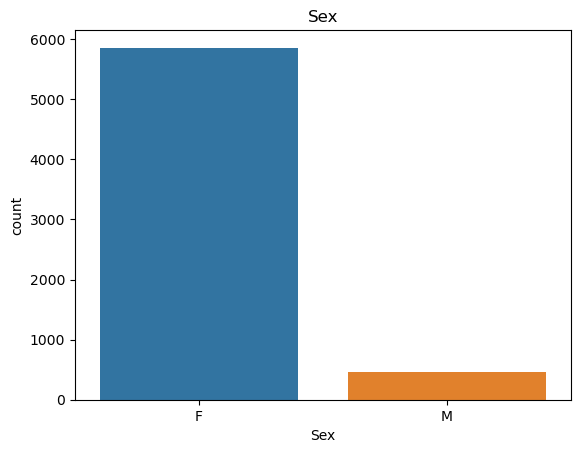

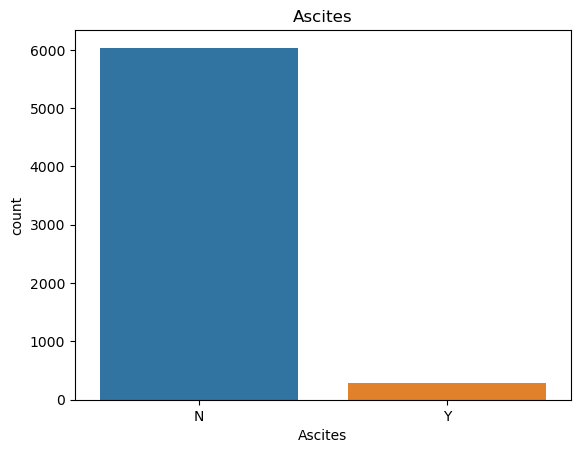

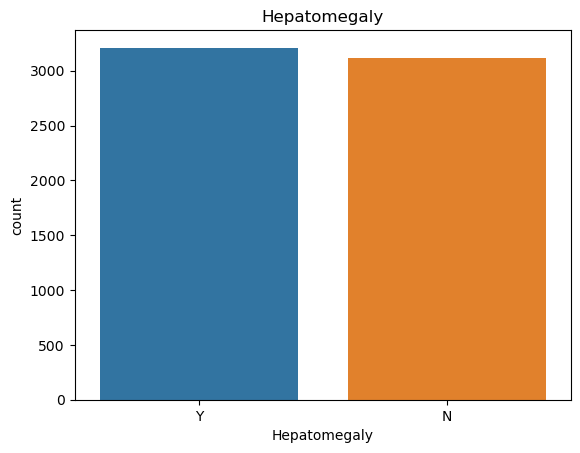

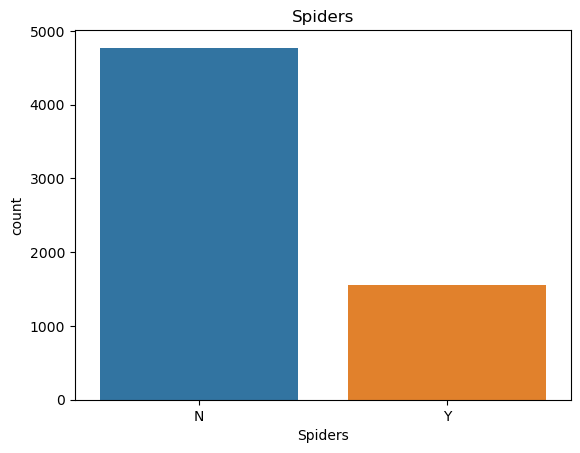

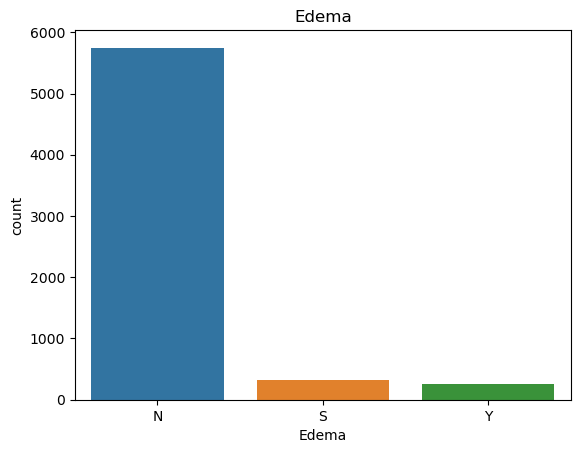

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
3750,3750,1216,1,28018,0,0,1,0,N,1.3,253.0,3.54,65.0,685.0,89.9,84.0,224.0,11.2,3.0,C,True,False,False,True,False,False
66,66,2357,0,19025,0,0,0,0,N,0.4,127.0,3.50,14.0,1032.0,49.6,84.0,334.0,9.9,2.0,D,True,False,False,False,False,True
1308,1308,1666,0,20354,0,0,0,0,N,0.5,198.0,3.61,40.0,676.0,93.0,56.0,244.0,9.7,3.0,C,True,False,False,True,False,False
794,794,1360,0,15177,1,0,0,0,N,2.1,335.0,3.50,20.0,1282.0,122.0,118.0,213.0,10.2,2.0,C,True,False,False,True,False,False
6962,6962,1769,1,14899,0,0,1,0,N,0.9,299.0,3.22,23.0,2769.0,220.1,85.0,303.0,10.6,3.0,D,True,False,False,False,False,True


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3750,3750,1216,1,28018,0,0,1,0,1.3,253.0,3.54,65.0,685.0,89.9,84.0,224.0,11.2,3.0,1,0,0,1,0,0
66,66,2357,0,19025,0,0,0,0,0.4,127.0,3.50,14.0,1032.0,49.6,84.0,334.0,9.9,2.0,1,0,0,0,0,1
1308,1308,1666,0,20354,0,0,0,0,0.5,198.0,3.61,40.0,676.0,93.0,56.0,244.0,9.7,3.0,1,0,0,1,0,0
794,794,1360,0,15177,1,0,0,0,2.1,335.0,3.50,20.0,1282.0,122.0,118.0,213.0,10.2,2.0,1,0,0,1,0,0
6962,6962,1769,1,14899,0,0,1,0,0.9,299.0,3.22,23.0,2769.0,220.1,85.0,303.0,10.6,3.0,1,0,0,0,0,1


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  int64
S                  int64
Y                  int64
C                  int64
CL                 int64
D                  int64
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.011632,0.010615,-0.014015,-0.006216,0.024316,0.014406,0.017069,0.011446,-0.018396,-0.023433,0.019010,-0.007641,0.023029,-0.018195,-0.002177,0.017891,-0.010678,-0.008638,-0.003031,0.015776,0.000547,0.011696,-0.005093
N_Days,-0.011632,1.000000,-0.004372,-0.104408,-0.063438,-0.246499,-0.289308,-0.223264,-0.340611,-0.149369,0.259662,-0.281380,-0.030316,-0.240155,-0.184995,0.152906,-0.157994,-0.221827,0.246236,-0.103401,-0.242806,0.342994,-0.064847,-0.325539
Drug,0.010615,-0.004372,1.000000,0.084819,0.032276,0.046129,-0.064797,0.006400,-0.047971,-0.003657,-0.029476,-0.005575,-0.008373,-0.042488,-0.069878,-0.023262,-0.033553,-0.029931,-0.028380,0.007930,0.032331,-0.025747,0.021251,0.018086
Age,-0.014015,-0.104408,0.084819,1.000000,0.113537,0.153509,0.114885,0.062068,0.100908,-0.053467,-0.122746,0.099427,0.028522,-0.022191,0.036841,-0.103477,0.141782,0.118797,-0.146394,0.084253,0.119526,-0.151074,-0.116531,0.199628
Sex,-0.006216,-0.063438,0.032276,0.113537,1.000000,0.045804,0.075620,-0.025925,0.039032,0.021296,-0.015701,0.166793,0.008848,0.064196,0.078055,-0.054321,0.073661,0.050564,-0.051655,0.066486,0.002107,-0.131097,0.009211,0.130463
Ascites,0.024316,-0.246499,0.046129,0.153509,0.045804,1.000000,0.178734,0.197840,0.351844,-0.040900,-0.324772,0.255031,0.053769,0.111104,0.116982,-0.176352,0.288307,0.173401,-0.510781,0.086242,0.643465,-0.254046,-0.024913,0.269393
Hepatomegaly,0.014406,-0.289308,-0.064797,0.114885,0.075620,0.178734,1.000000,0.331199,0.297066,0.143334,-0.267712,0.271530,0.125670,0.207366,0.158867,-0.205256,0.244191,0.504171,-0.226044,0.145047,0.168257,-0.389477,0.033365,0.385266
Spiders,0.017069,-0.223264,0.006400,0.062068,-0.025925,0.197840,0.331199,1.000000,0.251752,0.057349,-0.229670,0.263086,0.061775,0.152847,0.086783,-0.169170,0.274614,0.283672,-0.249684,0.138494,0.209532,-0.324123,0.026011,0.321299
Bilirubin,0.011446,-0.340611,-0.047971,0.100908,0.039032,0.351844,0.297066,0.251752,1.000000,0.317407,-0.287892,0.431169,0.133223,0.375311,0.301133,-0.079344,0.279163,0.201084,-0.307294,0.138014,0.293234,-0.419069,0.015280,0.422531
Cholesterol,-0.018396,-0.149369,-0.003657,-0.053467,0.021296,-0.040900,0.143334,0.057349,0.317407,1.000000,-0.085188,0.177097,0.129794,0.321125,0.264781,0.090546,0.027101,0.044401,0.018474,0.007483,-0.034830,-0.195346,0.048359,0.180975


<Axes: >

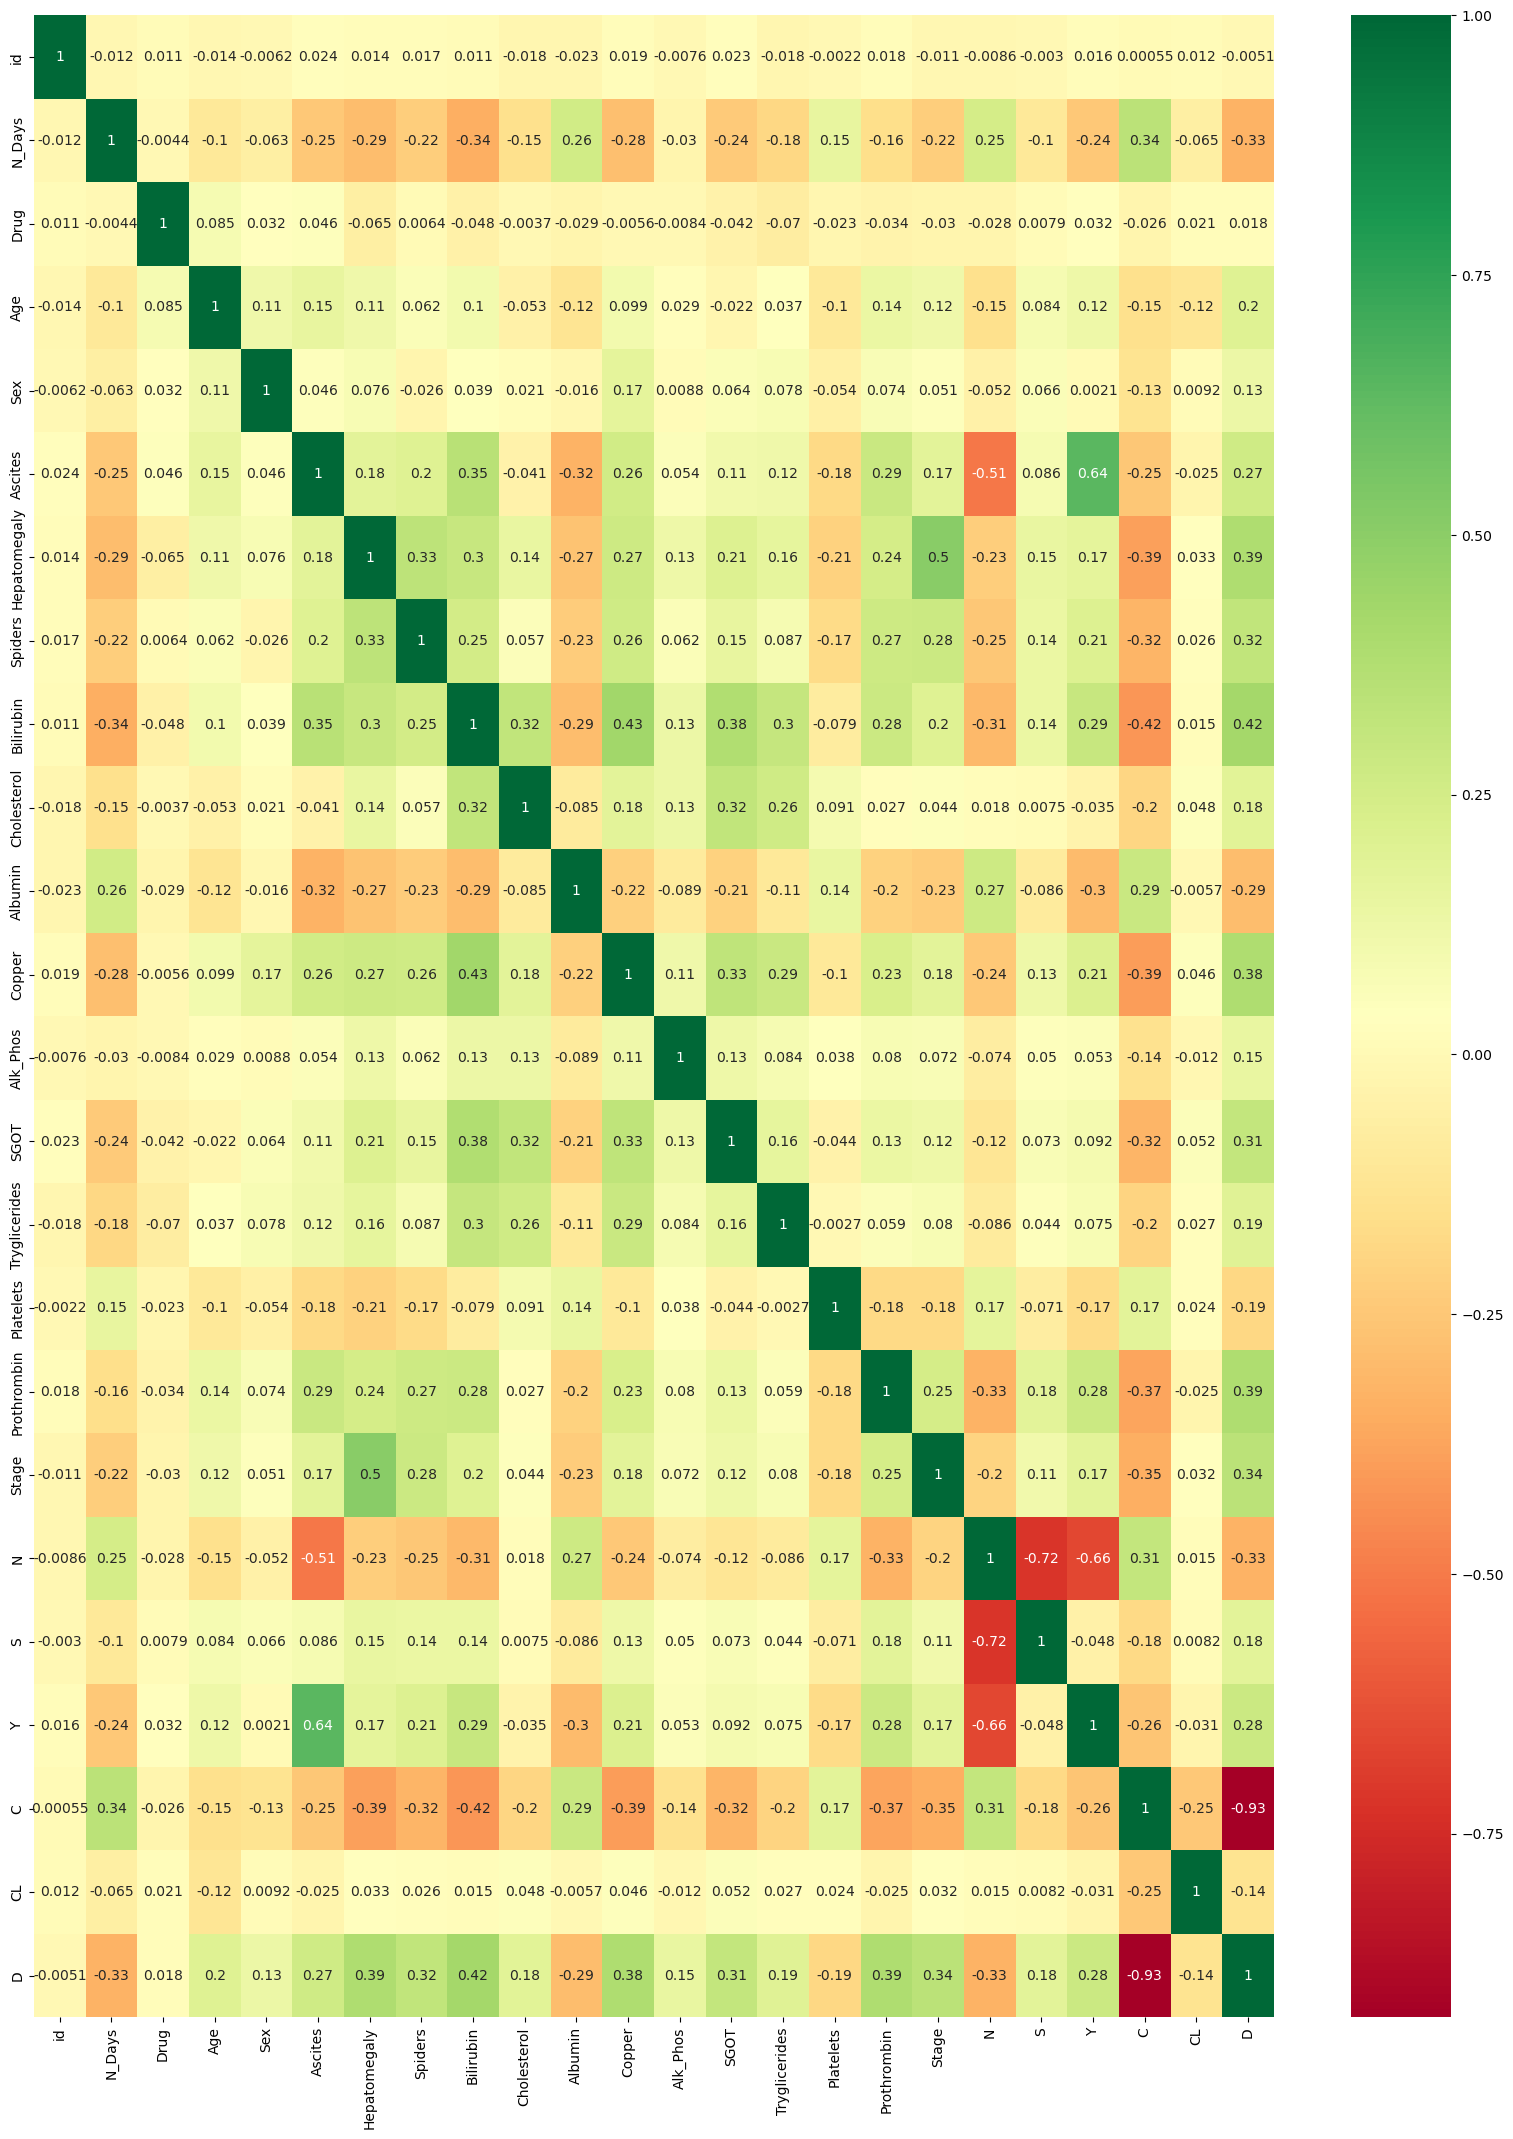

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

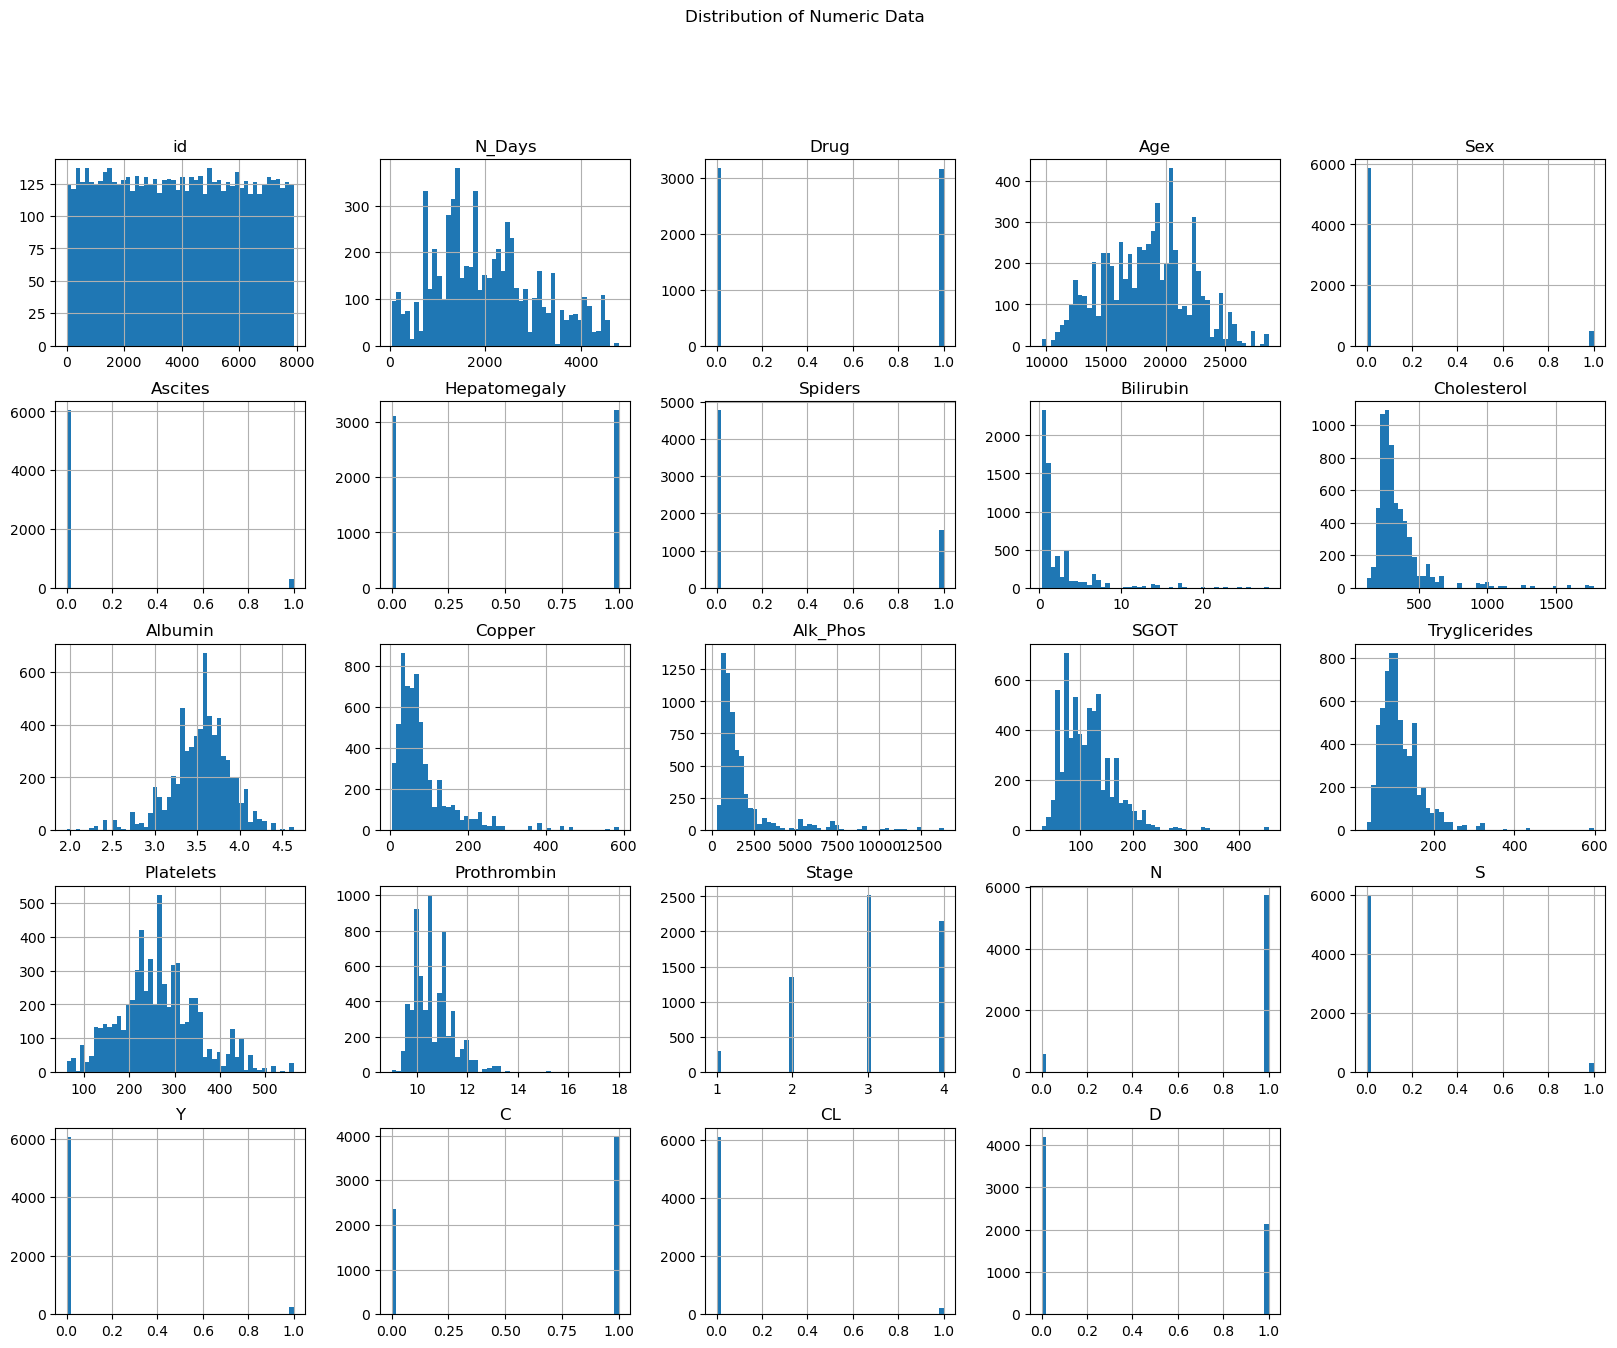

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

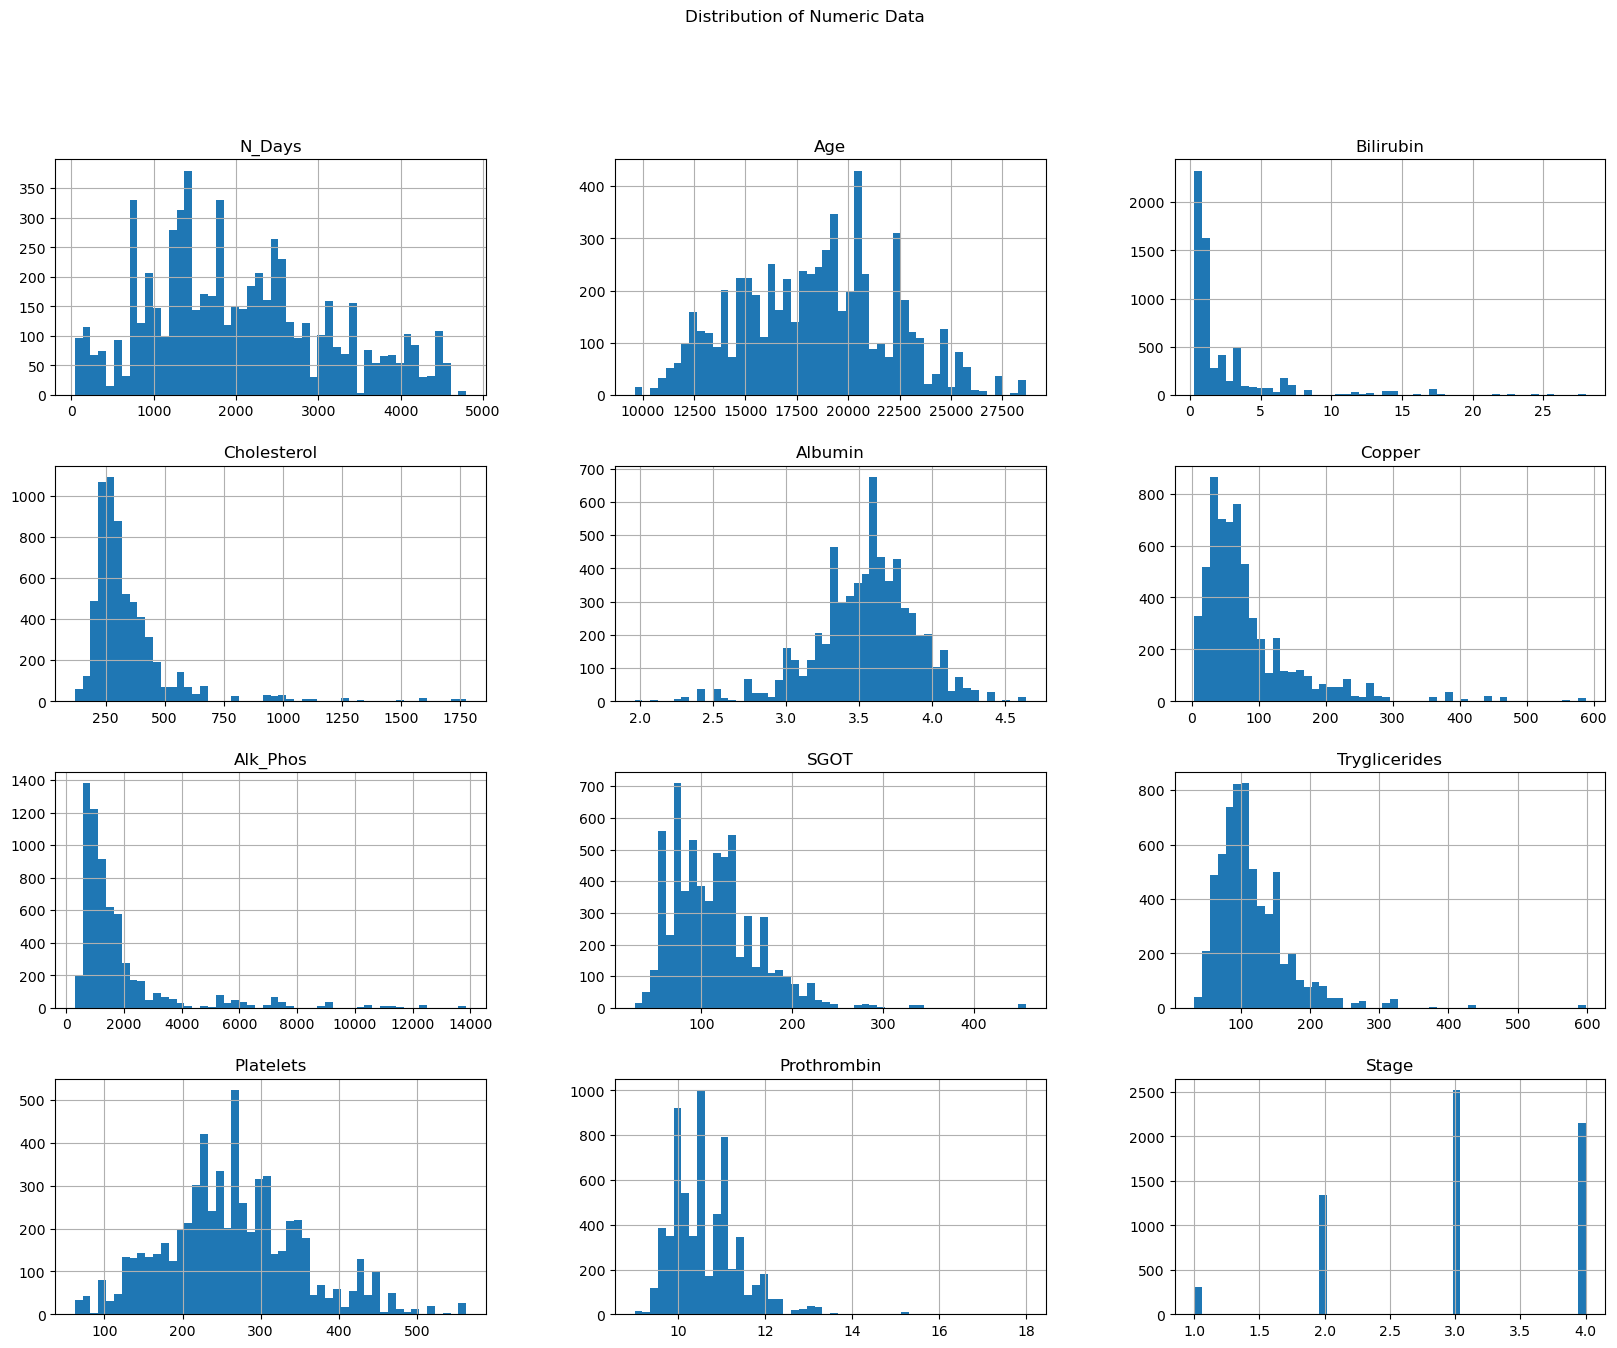

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

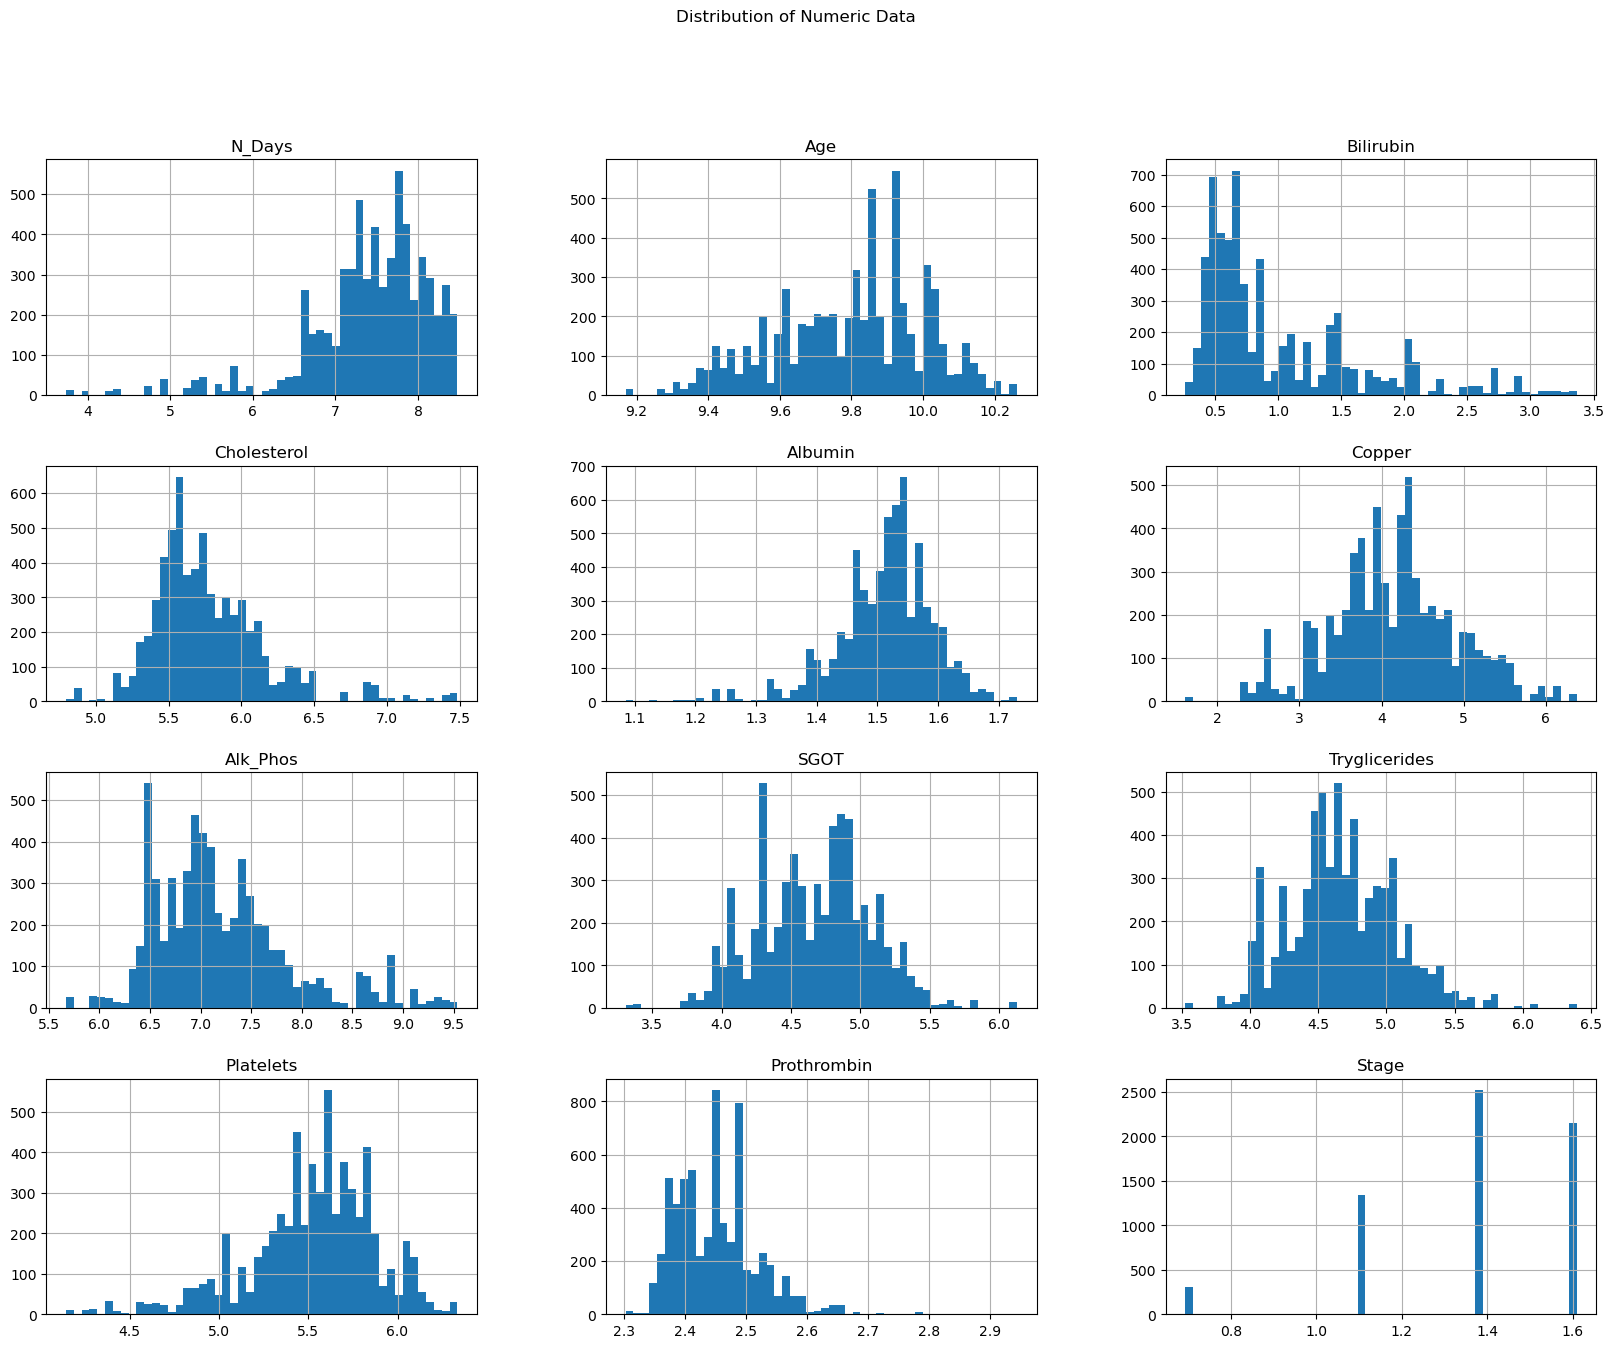

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

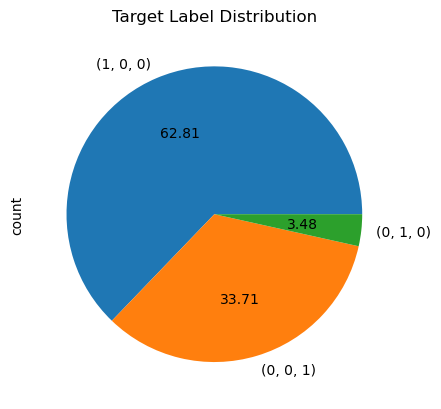

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 3750 to 4341
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N         

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [46]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [47]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [48]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 3750 to 4341
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6272 non-null   float64
 1   N_Days         6271 non-null   float64
 2   Drug           6276 non-null   float64
 3   Age            6277 non-null   float64
 4   Sex            6268 non-null   float64
 5   Ascites        6267 non-null   float64
 6   Hepatomegaly   6273 non-null   float64
 7   Spiders        6274 non-null   float64
 8   Bilirubin      6274 non-null   float64
 9   Cholesterol    6272 non-null   float64
 10  Albumin        6267 non-null   float64
 11  Copper         6271 non-null   float64
 12  Alk_Phos       6267 non-null   float64
 13  SGOT           6271 non-null   float64
 14  Tryglicerides  6269 non-null   float64
 15  Platelets      6264 non-null   float64
 16  Prothrombin    6277 non-null   float64
 17  Stage          6271 non-null   float64
 18  N         

In [49]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

id               52
N_Days           53
Drug             48
Age              47
Sex              56
Ascites          57
Hepatomegaly     51
Spiders          50
Bilirubin        50
Cholesterol      52
Albumin          57
Copper           53
Alk_Phos         57
SGOT             53
Tryglicerides    55
Platelets        60
Prothrombin      47
Stage            53
N                40
S                56
Y                53
C                57
CL               58
D                49
dtype: int64

## KNN imputation

In [50]:
from sklearn.impute import KNNImputer

In [51]:
train_copy.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3750,3750.0,7.104144,1.0,10.240638,0.0,0.0,1.0,0.0,0.832909,5.537334,1.512927,4.189655,6.530878,4.509760,4.442651,5.416100,2.501436,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
66,66.0,7.765569,0.0,9.853562,0.0,0.0,0.0,0.0,0.336472,4.852030,1.504077,2.708050,6.940222,3.923952,4.442651,5.814131,2.388763,1.098612,1.0,0.0,0.0,0.0,0.0,1.0
1308,1308.0,7.418781,0.0,9.921082,0.0,0.0,0.0,0.0,0.405465,5.293305,1.528228,3.713572,6.517671,4.543295,4.043051,5.501258,2.370244,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
794,794.0,7.215975,0.0,9.627602,1.0,0.0,0.0,0.0,1.131402,5.817111,1.504077,3.044522,7.156956,4.812184,4.779123,5.365976,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
6962,6962.0,7.478735,1.0,9.609116,0.0,0.0,1.0,0.0,0.641854,5.703782,1.439835,3.178054,7.926603,5.398615,4.454347,5.717028,2.451005,1.386294,1.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=15)

In [53]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

In [54]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [55]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [56]:
KNN_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,3750.0,7.104144,1.0,10.240638,0.0,0.0,1.0,0.0,0.832909,5.537334,1.512927,4.189655,6.530878,4.509760,4.442651,5.416100,2.501436,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,66.0,7.765569,0.0,9.853562,0.0,0.0,0.0,0.0,0.336472,4.852030,1.504077,2.708050,6.940222,3.923952,4.442651,5.814131,2.388763,1.098612,1.0,0.0,0.0,0.0,0.0,1.0
2,1308.0,7.418781,0.0,9.921082,0.0,0.0,0.0,0.0,0.405465,5.293305,1.528228,3.713572,6.517671,4.543295,4.043051,5.501258,2.370244,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
3,794.0,7.215975,0.0,9.627602,1.0,0.0,0.0,0.0,1.131402,5.817111,1.504077,3.044522,7.156956,4.812184,4.779123,5.365976,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,6962.0,7.478735,1.0,9.609116,0.0,0.0,1.0,0.0,0.641854,5.703782,1.439835,3.178054,7.926603,5.398615,4.454347,5.717028,2.451005,1.386294,1.0,0.0,0.0,0.0,0.0,1.0


In [57]:
# measuring the MSE between the original and imputed dataframes
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train.values, KNN_imputed_df.values)
print(f"Mean Squared Error for KNN imputation is : {mse}")

Mean Squared Error for KNN imputation is : 2389.0486954351195


## Median Imputation

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [60]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer.fit_transform(train_copy)

In [61]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)

In [62]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [63]:
Median_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,3750.0,7.104144,1.0,10.240638,0.0,0.0,1.0,0.0,0.832909,5.537334,1.512927,4.189655,6.530878,4.509760,4.442651,5.416100,2.501436,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,66.0,7.765569,0.0,9.853562,0.0,0.0,0.0,0.0,0.336472,4.852030,1.504077,2.708050,6.940222,3.923952,4.442651,5.814131,2.388763,1.098612,1.0,0.0,0.0,0.0,0.0,1.0
2,1308.0,7.418781,0.0,9.921082,0.0,0.0,0.0,0.0,0.405465,5.293305,1.528228,3.713572,6.517671,4.543295,4.043051,5.501258,2.370244,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
3,794.0,7.215975,0.0,9.627602,1.0,0.0,0.0,0.0,1.131402,5.817111,1.504077,3.044522,7.156956,4.812184,4.779123,5.365976,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,6962.0,7.478735,1.0,9.609116,0.0,0.0,1.0,0.0,0.641854,5.703782,1.439835,3.178054,7.926603,5.398615,4.454347,5.717028,2.451005,1.386294,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# measuring the MSE between the original and imputed dataframes
mse = mean_squared_error(train.values, Median_imputed_df.values)
print(f"Mean Squared Error for Median Imputation is : {mse}")

Mean Squared Error for Median Imputation is : 2162.971104460055


# MICE (Multiple Imputation by Chained Equation) Imputation

In [65]:
#to exclude ID from data removal
def make_random_nans3(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))
    
    #exclude ID
    a = list(df.columns)
    b = a[1:]
    
    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)
    
    for row in rows_to_nan:
        columns_to_nan = np.random.choice(b, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [67]:
train3 = train.copy()

In [68]:
make_random_nans3(train3,0.1,0.1)

In [69]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 3750 to 4341
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6268 non-null   float64
 2   Drug           6272 non-null   float64
 3   Age            6256 non-null   float64
 4   Sex            6275 non-null   float64
 5   Ascites        6254 non-null   float64
 6   Hepatomegaly   6272 non-null   float64
 7   Spiders        6266 non-null   float64
 8   Bilirubin      6259 non-null   float64
 9   Cholesterol    6270 non-null   float64
 10  Albumin        6271 non-null   float64
 11  Copper         6274 non-null   float64
 12  Alk_Phos       6273 non-null   float64
 13  SGOT           6281 non-null   float64
 14  Tryglicerides  6259 non-null   float64
 15  Platelets      6260 non-null   float64
 16  Prothrombin    6275 non-null   float64
 17  Stage          6273 non-null   float64
 18  N         

In [70]:
imputer3 = IterativeImputer(random_state=100, max_iter=10)

In [71]:
train3_imputed_data = imputer3.fit_transform(train3)

In [72]:
train3_imputed_df = pd.DataFrame(train3_imputed_data, columns=train.columns)

In [73]:
train3_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   float64
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   float64
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   float64
 5   Ascites        6324 non-null   float64
 6   Hepatomegaly   6324 non-null   float64
 7   Spiders        6324 non-null   float64
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N       

In [74]:
train3_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,3750.0,7.104144,1.0,10.240638,0.0,0.0,1.0,0.0,0.832909,5.537334,1.512927,4.189655,6.530878,4.509760,4.442651,5.416100,2.501436,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,66.0,7.765569,0.0,9.853562,0.0,0.0,0.0,0.0,0.336472,4.852030,1.504077,2.708050,6.940222,3.923952,4.442651,5.814131,2.388763,1.098612,1.0,0.0,0.0,0.0,0.0,1.0
2,1308.0,7.418781,0.0,9.921082,0.0,0.0,0.0,0.0,0.405465,5.293305,1.528228,3.713572,6.517671,4.543295,4.043051,5.501258,2.370244,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
3,794.0,7.215975,0.0,9.627602,1.0,0.0,0.0,0.0,1.131402,5.817111,1.504077,3.044522,7.156956,4.812184,4.779123,5.365976,2.415914,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,6962.0,7.478735,1.0,9.609116,0.0,0.0,1.0,0.0,0.641854,5.703782,1.439835,3.178054,7.926603,5.398615,4.454347,5.717028,2.451005,1.386294,1.0,0.0,0.0,0.0,0.0,1.0


In [75]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3750,3750,7.104144,1,10.240638,0,0,1,0,0.832909,5.537334,1.512927,4.189655,6.530878,4.509760,4.442651,5.416100,2.501436,1.386294,1,0,0,1,0,0
66,66,7.765569,0,9.853562,0,0,0,0,0.336472,4.852030,1.504077,2.708050,6.940222,3.923952,4.442651,5.814131,2.388763,1.098612,1,0,0,0,0,1
1308,1308,7.418781,0,9.921082,0,0,0,0,0.405465,5.293305,1.528228,3.713572,6.517671,4.543295,4.043051,5.501258,2.370244,1.386294,1,0,0,1,0,0
794,794,7.215975,0,9.627602,1,0,0,0,1.131402,5.817111,1.504077,3.044522,7.156956,4.812184,4.779123,5.365976,2.415914,1.098612,1,0,0,1,0,0
6962,6962,7.478735,1,9.609116,0,0,1,0,0.641854,5.703782,1.439835,3.178054,7.926603,5.398615,4.454347,5.717028,2.451005,1.386294,1,0,0,0,0,1


In [76]:
# measuring the MSE between the original and imputed dataframes 
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(train.values, train3_imputed_df.values)
print(f"Mean Squared Error: {mse3}")

Mean Squared Error: 0.0008904817809420722
